In [ ]:
# This code is, at this point, in ju.util

from typing import Mapping, Callable
from functools import partial


def display_dag_of_code(func, *args, **kwargs):
    from meshed import code_to_dag

    return code_to_dag(func).dot_digraph(*args, **kwargs)


def apply(func, obj):
    """
    Calls a function to an object, returing the result
    """
    return func(obj)


def _switch_case(mapping, default, feature):
    """
    Returns the value of a feature in a mapping or a default value
    """
    return mapping.get(feature, default)


def switch_case(mapping, default):
    """
    Returns a function that switches between cases based on a feature
    """
    return partial(_switch_case, mapping, default)


def _feature_based_search(
    feature_processor_pairs, feature_similarity, default, feature
):
    """
    Returns the output of a feature based on a list of feature_processor_pairs
    """
    if isinstance(feature_processor_pairs, Mapping):
        feature_processor_pairs = feature_processor_pairs.items()
    feature_matches = partial(feature_similarity, feature)
    for feature_compared_to, then_ in feature_processor_pairs:
        if feature_matches(feature_compared_to):
            return then_
    return default


def feature_based_search(feature_processor_pairs, feature_similarity, default):
    """
    Returns a function that searches for a feature in a list of feature_processor_pairs
    """
    return partial(
        _feature_based_search, feature_processor_pairs, feature_similarity, default
    )


def feature_switch(obj, *, featurizer, feature_to_output_mapping, default):
    """
    Returns the output of a feature based on a featurizer and a mapping
    """
    feature = apply(featurizer, obj)
    get_output_for_feature = switch_case(feature_to_output_mapping, default)
    output = apply(get_output_for_feature, feature)
    return output


def feature_similarity_search(
    obj,
    *,
    featurizer,
    feature_based_search,
    feature_output_pairs,
    feature_similarity,
    similarity_base_match=lambda x, y: x == y,
):
    """
    Returns the output of a feature based on a featurizer and a list of feature_output_pairs
    """
    feature = apply(obj, featurizer)
    get_output_for_feature = feature_based_search(
        feature_output_pairs, feature_similarity, similarity_base_match
    )
    output = apply(get_output_for_feature, feature)
    return output


# Explorations and deliberations

## Routing patterns

In [41]:
from meshed import code_to_dag, Pipe
from operator import methodcaller

disp_dag = Pipe(code_to_dag, methodcaller('dot_digraph', 'rankdir="LR"'))


<Pipe containing: code_to_dag, methodcaller>

In [46]:
def object_processing(obj, process_obj):
    processed_obj = process_obj(obj)
    return processed_obj

disp_dag(object_processing)

ValueError: All commands should be assignments, this one wasn't: lineno=3

In [48]:
from meshed.makers import *

it = parse_assignment_steps(object_processing)
next(it)

(<ast.Name at 0x2a5523ee0>, <ast.Call at 0x2a5523790>)

In [49]:
next(it)

ValueError: All commands should be assignments, this one wasn't: lineno=3

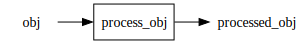

In [ ]:
def object_processing(obj, process_obj):
    processed_obj = process_obj(obj)

object_processing.dot_digraph('rankdir="LR"')

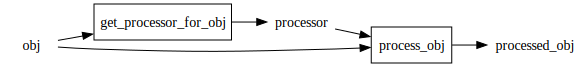

In [ ]:
@__import__('meshed').code_to_dag
def conditional_object_processing():
    processor = get_processor_for_obj(obj)
    processed_obj = process_obj(obj, processor)

conditional_object_processing.dot_digraph('rankdir="LR"')

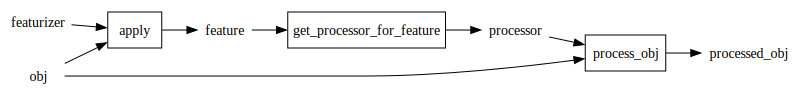

In [37]:
@__import__('meshed').code_to_dag
def feature_conditional_object_processing():
    feature = apply(obj, featurizer)
    processor = get_processor_for_feature(feature)
    processed_obj = process_obj(obj, processor)

feature_conditional_object_processing.dot_digraph('rankdir="LR"')

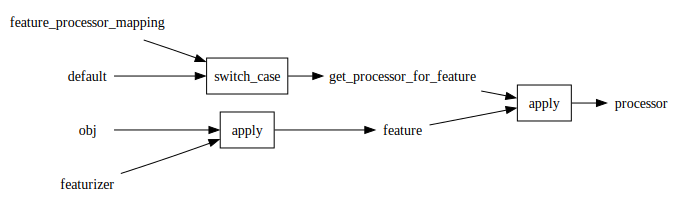

In [7]:
@__import__('meshed').code_to_dag
def feature_switch_object_processing():
    feature = apply(obj, featurizer)
    get_processor_for_feature = switch_case(feature_processor_mapping, default)
    processor = apply(get_processor_for_feature, feature)
    # processed_obj = process_obj(obj, processor)

feature_switch_object_processing.dot_digraph('rankdir="LR"')

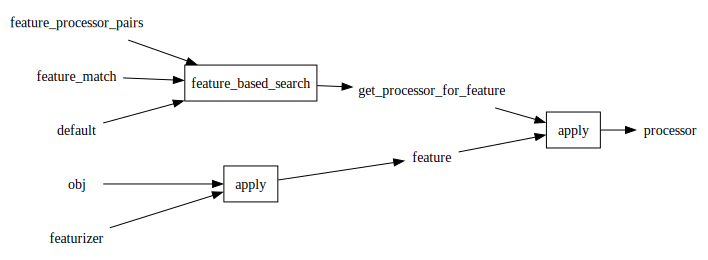

In [8]:
@__import__('meshed').code_to_dag
def feature_search_object_processing():
    feature = apply(obj, featurizer)
    get_processor_for_feature = feature_based_search(feature_processor_pairs, feature_match, default)
    processor = apply(get_processor_for_feature, feature)
    # processed_obj = process_obj(obj, processor)

feature_search_object_processing.dot_digraph('rankdir="LR"')

In [50]:
from functools import partial
from meshed import code_to_dag

NO_DFLT = type('NO_DFLT', (), {})()

def display_dag_of_code(func, *args, **kwargs):
    return code_to_dag(func).dot_digraph()


def apply(func, obj):
    return func(obj)

def _switch_case(mapping, default, feature):
    return mapping.get(feature, default)
    
def switch_case(mapping, default=NO_DFLT):
    return partial(_switch_case, mapping, default)

def _feature_based_search(
        feature_processor_pairs, feature_similarity, default, feature
    ):
    if isinstance(feature_processor_pairs, Mapping):
        feature_processor_pairs = feature_processor_pairs.items()
    feature_matches = partial(feature_similarity, feature)
    for feature_compared_to, then_ in feature_processor_pairs:
        if feature_matches(feature_compared_to):
            return then_
    return default
    
def feature_based_search(feature_processor_pairs, feature_similarity, default):
    return partial(
        _feature_based_search, feature_processor_pairs, feature_similarity, default
    )

def feature_switch(
        obj,
        *,
        featurizer,
        feature_to_output_mapping, 
        default
    ):
    feature = apply(featurizer, obj)
    get_output_for_feature = switch_case(feature_to_output_mapping, default)
    output = apply(get_output_for_feature, feature)
    return output
    # processed_obj = process_obj(obj, processor)

def feature_similarity_search(
        obj,
        *,
        featurizer,
        feature_based_search,
        feature_output_pairs, 
        feature_similarity, 
        similarity_base_match=lambda x, y: x == y,
    ):
    feature = apply(obj, featurizer)
    get_output_for_feature = feature_based_search(feature_output_pairs, feature_similarity, similarity_base_match)
    output = apply(get_output_for_feature, feature)
    return output
    # processed_obj = process_obj(obj, processor)

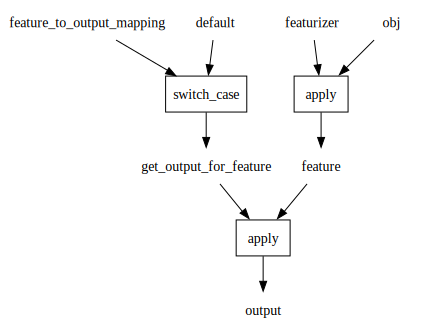

In [36]:
display_dag_of_code(feature_switch)

In [39]:
from opus.scrap.tw.py2rjsf import *

from operator import attrgetter
from i2 import FuncFactory

FeatureSwitch = FuncFactory(feature_switch)

dflt_type_mapping = {
    int: {"type": "integer"},
    float: {"type": "number"},
    bool: {"type": "boolean"},
    str: {"type": "string"},
}

type_feature_switch = FeatureSwitch(
    featurizer=attrgetter('annotation'),
    feature_to_output_mapping=dflt_type_mapping,
    default={"type": "string"},
)

def function_to_json_schema_2(
        func: Callable,
        *,
        type_feature_switch=type_feature_switch,
    ):
    # Fetch function metadata
    sig = inspect.signature(func)
    parameters = sig.parameters

    # Start building the JSON schema
    schema = {
        'title': func.__name__,
        'type': 'object',
        'properties': {},
        'required': [],
    }

    if doc := inspect.getdoc(func):
        schema['description'] = doc

    # Build the schema for each parameter
    for name, param in parameters.items():
        field = type_feature_switch(param)
        
        # If there's a default value, add it to the schema
        if param.default is not inspect.Parameter.empty:
            field['default'] = param.default
        else:
            schema['required'].append(name)

        # Add the field to the schema
        schema['properties'][name] = field

    return schema

from opus.scrap.tw.py2rjsf import test_schema_gen
test_schema_gen(function_to_json_schema_2)

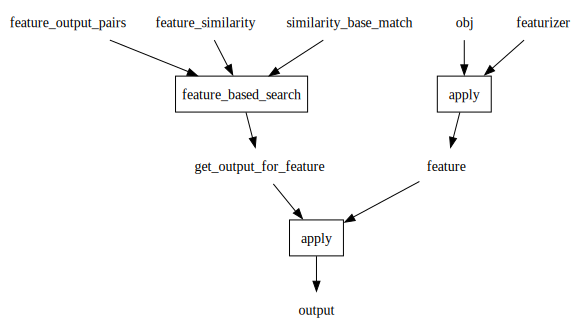

In [23]:
display_dag_of_code(feature_similarity_search)

In [5]:
dag = feature_similarity_search_object_processing

[autoreload of opus.scrap.tw.py2rjsf failed: Traceback (most recent call last):
  File "/Users/thorwhalen/.pyenv/versions/3.10.8/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/Users/thorwhalen/.pyenv/versions/3.10.8/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 471, in superreload
    module = reload(module)
  File "/Users/thorwhalen/.pyenv/versions/3.10.8/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/thorwhalen/Dropbox/py/proj/so/opus/opus/scrap/tw/py2rjsf.p

ModuleNotFoundError: No module named 'kaggle'
You might try to do a `pip install kaggle` in the terminal?


In [34]:
# from qo import ddir

# ddir(i2.wrapper)
